In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lendo janeiro até dezembro(11)

In [110]:
dirtydata = pd.read_excel('giu.xls')

In [112]:
dirtydata['tipogasto'] = ''
dirtydata.head()

,data,historico,doc,credito,debito,saldo,tipogasto
0,28/12/17,SALDO ANTERIOR,NaN,NaN,NaN,15109.85,
1,02/01/18,Saque c/c Bdn,8416470.0,NaN,-40.0,15069.85,
2,NaN,Ag01276maq018416seq0447029121402,NaN,NaN,NaN,NaN,
3,02/01/18,Pagto Cobranca,104.0,NaN,-1050.0,NaN,
4,NaN,Cartao Caixa,NaN,NaN,NaN,NaN,


### Precisamos tratar trazer o tipo de gasto para uma coluna acima

In [113]:
for index, row in dirtydata.iterrows():
    if row['data'] is not np.NaN:
        dirtydata.loc[index,['tipogasto']] = dirtydata['historico'].loc[index+1]

In [114]:
finaldata = dirtydata[np.isfinite(dirtydata['debito'])][['data','tipogasto', 'historico','debito']]

In [115]:
### Transformando o débito em valor positivo
finaldata.debito = -finaldata.debito

## Estatísticas dos gastos

In [116]:
finaldata.describe()

,debito
count,1578.000000
mean,82.166584
std,418.426704
min,0.020000
25%,11.990000
50%,27.750000
75%,52.000000
max,10050.000000


In [117]:
## Quais foram os maiores gastos?

### Categorizando supermercados(Deli delicia, mercado bambina, Zona sul)

In [118]:
mercados = 'zona|deli|merc|supermer'
finaldata['categoria'] = np.where(finaldata['tipogasto'].str.contains(mercados,case=False),'supermercado','outros')

In [119]:
#tranformando data em data
import datetime
finaldata['data'] = finaldata['data'].map(lambda x: datetime.datetime.strptime( x, '%d/%m/%y' ))
#pd.to_datetime(finaldata['data'], format='%d/%m/%Y')

In [120]:
#Criando uma coluna para mes 
meses = {1: 'jan', 2: 'fev', 3: 'mar', 4: 'abr',
        5:'mai', 6:'jun', 7:'jul', 8:'ago',9:'set',
         10:'out', 11:'nov',12:'dez'}
finaldata['mes_nomes'] = finaldata['data'].map(lambda x: x.month).map(meses)

In [121]:
# recuperando dados de apenas supermercados
superdf = finaldata[finaldata['categoria'] == 'supermercado']

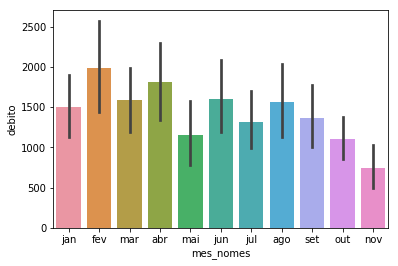

In [122]:
sns.barplot(x="mes_nomes", y="debito", data=superdf, estimator=sum)

In [123]:
superdf = superdf.set_index(['data'])

In [124]:
superdf.groupby(['tipogasto']).sum()['debito']
#superdf.groupby(['tipogasto']).sum()['debito'].unstack().nlargest(10, 'debito')

tipogasto
Candy Delicatesse         18.34
Deli Delicia               6.18
Deli Delicia Generos    3641.00
Dfa Brasil Comercio       28.40
Mercadinho Bambina      1256.46
Mercadopago              146.61
Pocaje Mercearia          23.00
Supermerc Princesa       235.78
Vossa Mercearia          255.02
Vossa Mercearia Ltda    1517.30
Zona Sul Pizzaria         51.40
Zona Sul fl 1020        1199.83
Zona Sul fl 20          7005.05
Zona Sul fl 39           372.56
Name: debito, dtype: float64

## TOTAL DE GASTO DE JANEIRO A NOVEMBRO

In [125]:
superdf.debito.sum()

15756.929999999998

Text(0.5, 1.0, 'Máximas')

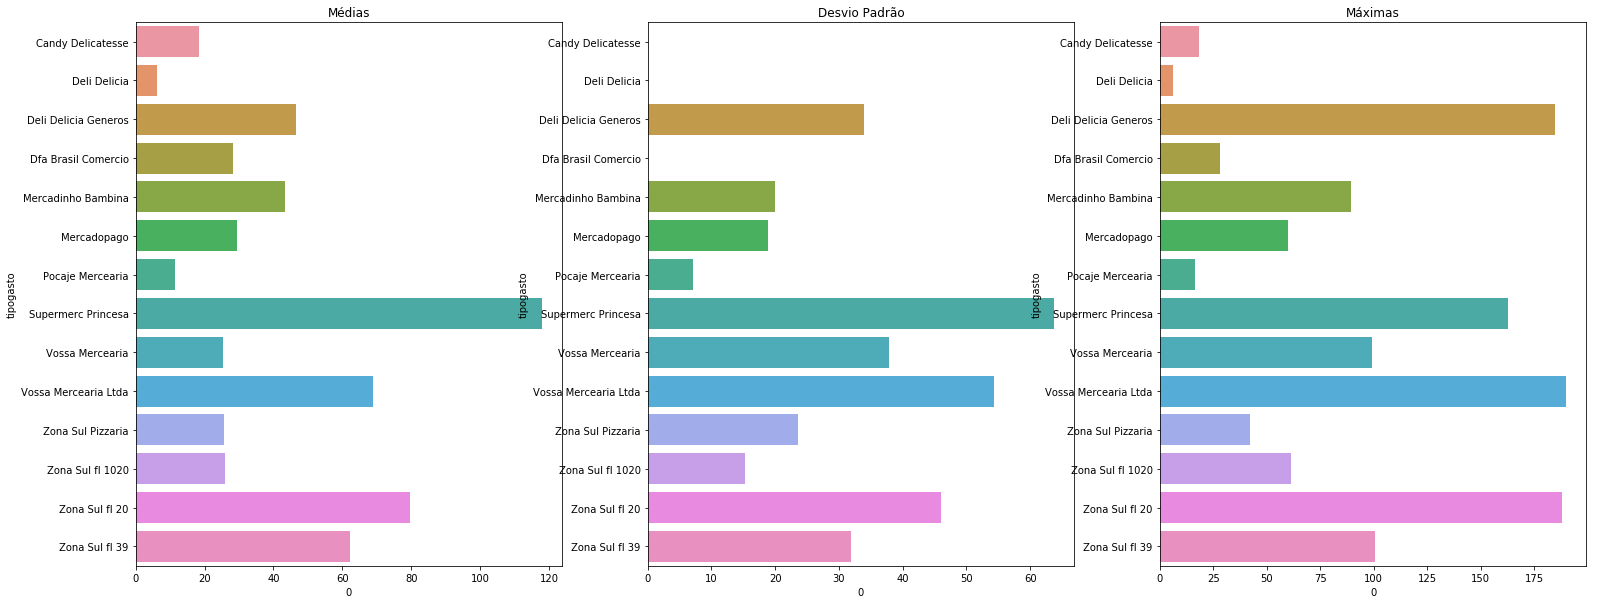

In [126]:
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(10)]
spmean = superdf.groupby(['tipogasto']).describe().unstack().loc['debito']['mean'].reset_index() #.plot.barh( stacked=True, colormap='Paired')
spstd = superdf.groupby(['tipogasto']).describe().unstack().loc['debito']['std'].reset_index()
spmax = superdf.groupby(['tipogasto']).describe().unstack().loc['debito']['max'].reset_index()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26,10))
#spmean.plot(x = spmean.tipogasto, y=spmean[spmean.columns.values[1]], kind='barh', colormap='magma', ax=ax1)
sns.barplot(x =spmean[spmean.columns.values[1]] , y=spmean.tipogasto, ax=ax1, orient='h').set_title('Médias') 
sns.barplot(y = spstd.tipogasto, x=spstd[spstd.columns.values[1]], ax=ax2, orient='h').set_title('Desvio Padrão') 
sns.barplot(y = spmax.tipogasto, x=spmax[spmax.columns.values[1]], ax=ax3, orient='h').set_title('Máximas')  


In [ ]:
#mapeando saques
finaldata.tipogasto = finaldata.tipogasto.map(lambda x: 'saque' if str(x).startswith('Ag0') else x)
finaldata.tipogasto = finaldata.tipogasto.map(lambda x: 'saque' if str(x).startswith('000') else x)
#mapeando 

### Quanto forams os gastos totais divididos em supermercado etc...?

In [ ]:
 finaldata.groupby(['categoria']).sum()['debito']
#plt.show()
#.nlargest(10, 'debito').plot()

# Apenas de 2018 nos meses janeiro a novembro gastei 15000 reais... Vamos vizualizar isso

In [ ]:
sns.barplot(x="categoria", y="debito", data=finaldata, estimator=sum)
plt.show()

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
sns.barplot(x="mes", y="debito", data=finaldata, estimator=sum, ax=axs[0])
sns.barplot(x="mes", y="debito", data=finaldata[finaldata['categoria'] == 'supermercado'], estimator=sum, ax=axs[1])
fig

### Setando o index a data

In [ ]:
final = finaldata.set_index(['data'])

In [ ]:
final[final['categoria'] == 'supermercado'].groupby(['mes']).sum().unstack().plot.bar()
#final.groupby([pd.Grouper(freq='M'),'categoria']).size().plot.bar()
#final.groupby([pd.Grouper(freq='M'),'categoria']).sum()['debito'].unstack().plot.bar()
#sns.barplot(final['mes'], final[])
plt.show()


In [ ]:
finaldata.plot(x='categoria', y='debito')
plt.show()

In [ ]:
def bogo_bubble(blist):
    cmpcount, swapcount = 0, 0
    n = 0
    while n < len(blist) - 1:
        cmpcount += 1
        if blist[n] > blist[n + 1]:
            swapcount += 1
            blist[n], blist[n+1] = blist[n+1], blist[n]
            n = 0
        else:
            n = n + 1
    return blist, cmpcount, swapcount


In [ ]:
def wp1_bubble(blist):
    cmpcount, swapcount = 0, 0
    while True:
        swapped = False
        for i in range(1, len(blist)):
            cmpcount += 1
            if blist[i-1] > blist[i]:
                swapcount += 1
                blist[i-1], blist[i] = blist[i], blist[i-1]
                swapped = True
        if not swapped:
            break
    return blist, cmpcount, swapcount

In [ ]:
def wp2_bubble(blist):
    cmpcount, swapcount = 0, 0
    n = len(blist)
    while True:
        swapped = False
        for i in range(1, n):
            cmpcount += 1
            if blist[i-1] > blist[i]:
                swapcount += 1
                blist[i-1], blist[i] = blist[i], blist[i-1]
                swapped = True
        n -= 1
        if not swapped:
            break
    return blist, cmpcount, swapcount

import random
alist = [random.randrange(100) for _ in range(100)]
bb, cb, sb = bogo_bubble(alist[:])
b1, c1, s1 = wp1_bubble(alist[:])
b2, c2, s2 = wp2_bubble(alist[:])
assert bb == b1 == b2
print('bogo_bubble: {} cmp, {} swap'.format(cb, sb))
print('wp1_bubble : {} cmp, {} swap'.format(c1, s1))
print('wp2_bubble : {} cmp, {} swap'.format(c2, s2))